<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_TDA%2B_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝Projet TDA + Signature**
L’objectif de ce projet est d’appliquer les méthodes de TDA sur des données temporelles.
Chaque fichier est composé de 10 colonnes :

Temps - temps en ms ;
2-9) Canal - huit canaux EMG du bracelet MYO Thalmic;

Classe - le label des gestes :

*   0 - données non marquées,
*   1 - main au repos,
*   2 - main serrée en poing,
*   3 - flexion du poignet,
*   4 - extension du poignet,
*   5 - déviations radiales,
*   6 - déviations ulnaires
*   7 - paume étendue (le geste n'a pas été effectué par tous les sujets)






**1- Description des données**

In [2]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
data.head(10)

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
5,9,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
6,10,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
7,11,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
8,12,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
9,13,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


**🧮 Nombre de classes du jeu de données**

In [3]:
# Calculer le nombre de classes uniques dans la colonne 'Class'
nombre_classes = data['class'].nunique()

# Afficher le nombre de classes
print("Nombre de classes uniques :", nombre_classes)

# Pour voir la liste des classes uniques
classes_uniques = data['class'].unique()
print("Classes uniques :", classes_uniques)

Nombre de classes uniques : 7
Classes uniques : [0 1 2 3 4 5 6]


In [4]:
sumarize = data.describe()
print(sumarize)

               time      channel1      channel2      channel3      channel4  \
count  63196.000000  63196.000000  63196.000000  63196.000000  63196.000000   
mean   32777.490094     -0.000008     -0.000009     -0.000009     -0.000010   
std    18943.835626      0.000144      0.000134      0.000124      0.000155   
min        1.000000     -0.001110     -0.001020     -0.000910     -0.001040   
25%    16340.750000     -0.000030     -0.000040     -0.000050     -0.000040   
50%    32781.500000     -0.000010     -0.000010     -0.000010     -0.000010   
75%    49199.250000      0.000010      0.000020      0.000030      0.000020   
max    65661.000000      0.001270      0.001270      0.001270      0.001270   

           channel5     channel6      channel7      channel8         class  
count  63196.000000  63196.00000  63196.000000  63196.000000  63196.000000  
mean      -0.000012     -0.00001     -0.000008     -0.000008      1.212086  
std        0.000198      0.00016      0.000133      0.000

**Qualité des données**

In [5]:
# Qualité des données
print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())
print("\nNombre de doublons:")
print(data.duplicated().sum())


Valeurs manquantes par colonne:
time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

Nombre de doublons:
0


Il n'y a pas de valeurs manquantes, pas de doublons.

In [6]:
distribution_classes = data['class'].value_counts()
print(distribution_classes)

class
0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: count, dtype: int64


⚖️  La distribution montre un **déséquilibre** important entre les classes. Par exemple, la classe 0 contient 41 272 occurrences, alors que les autres classes en contiennent entre 3 441 et 3 816 occurrences. Cela pourrait poser des problèmes pour l'entraînement de modèles de Machine Learning, car les classes minoritaires risquent d'être sous-représentées dans les prédictions.

**📊 Histogramme pour les variables numérique**s

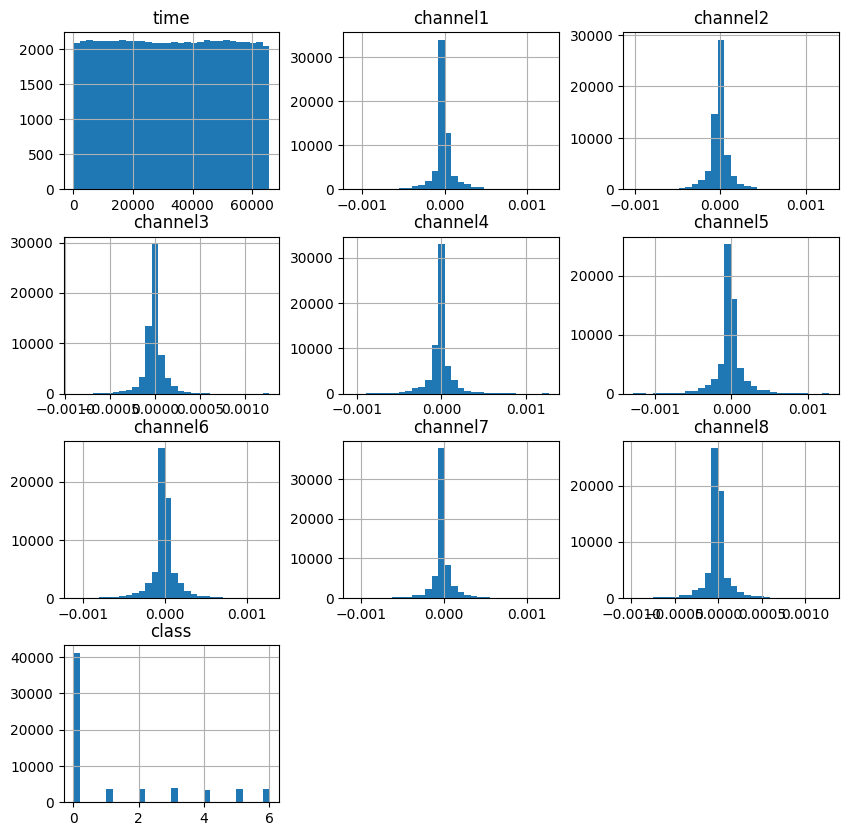

In [7]:
# Histogramme pour les variables numériques
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(10, 10))
plt.show()

La classe 0 représente des **"données non marquées"** ou une situation de "repos" ou "absence de geste", il est **normal qu'elle soit plus fréquente**, surtout dans les contextes où les gestes spécifiques ne sont exécutés que brièvement et/ou moins fréquemment. Ensuite la classe 3 est la plus fréquente. D'accord que ce n'est pas très visible sur mon histogramme.

**Heatmap**

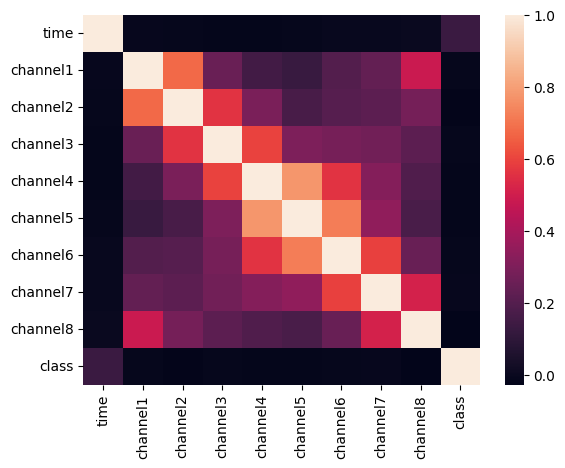

In [8]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

💡 On observe pas une corrélation entre un channel et class. Il n'y a pas un channel qui a plus d'impact que d'autres sur la classe. On observe une corrélation entre le "channel 4" et le "channel 5", entre "channel 6" et le "channel 5", "channel 1" et le "channel 2".

**2. Découper la série temporelle de manière à récupérer plusieurs séries à label unique**

In [9]:
# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)  # diff() calcule la différence entre chaque élément et son précédent
change_indices = changes[changes].index.tolist()  # récupérer les indices des changements

# Ajouter le premier index de la série et le dernier index de la série pour compléter les sous-séries
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

# Afficher le résultat
for index, series in enumerate(sub_series):
    print(f"Sous-série {index + 1} avec label unique:")
    print(series.head())  # afficher les premières lignes de chaque sous-série
    print("\n")


Sous-série 1 avec label unique:
   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  
0  -0.00001      0  
1  -0.00001      0  
2   0.00001      0  
3   0.00001      0  
4   0.00001      0  


Sous-série 2 avec label unique:
      time  channel1  channel2  channel3  channel4  channel5  channel6  \
2287  2400  -0.00001   0.00000  -0.00001   0.00000   0.00000  -0.00001   
2288  2401  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2289  2402  -0.00001  -0.00002   0.00000  -0.00001  -0.00001  -0.00001   
2290  2403  -0.00001  -0.

**3. Utiliser la TDA pour créer un modèle de classification. Que peut on dire?**

Installation des bibliothèques Python

In [10]:
!pip install gudhi
!pip install giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


 Importation des bibliothèques nécessaires pour effectuer une analyse de données

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy

**Préparation pour la TDA**

Créez des ensembles d'entraînement et de test à partir des sous-séries.

In [14]:
# Collecter les données et les labels
X_tda = []
y_tda = []

for series in sub_series:
    X_tda.append(series.drop(columns=['class']).values)  # Les colonnes des caractéristiques
    y_tda.append(series['class'].iloc[0])  # Le label unique de la sous-série

# Convertir en tableau numpy
X_tda = np.array(X_tda, dtype=object)
y_tda = np.array(y_tda)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tda, y_tda, test_size=0.3, random_state=42)


**Extraction de caractéristiques TDA**

Appliquez Vietoris-Rips Persistence sur chaque sous-série.

In [15]:
# Ajouter une troisième dimension à chaque série (reshape en 3D)
X_train_reshaped = [series[:, :, np.newaxis] for series in X_train]
X_test_reshaped = [series[:, :, np.newaxis] for series in X_test]

In [16]:
# Appliquer VietorisRipsPersistence
tda = VietorisRipsPersistence(metric='euclidean', homology_dimensions=(0, 1))

X_train_tda = [tda.fit_transform(series) for series in X_train_reshaped]
X_test_tda = [tda.transform(series) for series in X_test_reshaped]


In [17]:
print("Shapes des séries reshaped pour le train :")
for idx, series in enumerate(X_train_reshaped):
    print(f"Série {idx}: {series.shape}")

print("Shapes des séries reshaped pour le test :")
for idx, series in enumerate(X_test_reshaped):
    print(f"Série {idx}: {series.shape}")


In [18]:
fixed_length = 10  # Longueur fixe pour tous les vecteurs

 **Uniformisations les vecteurs**

On ajoute une fonction pour tronquer ou compléter les vecteurs

In [19]:
def pad_or_truncate(vector, length):
    if len(vector) > length:
        # Tronquer si le vecteur est trop long
        return vector[:length]
    else:
        # Compléter avec des zéros si le vecteur est trop court
        return np.pad(vector, (0, length - len(vector)), mode='constant')


**Calcul et uniformisation des caractéristiques**

On applique *PersistenceEntropy*, puis on uniformise la longueur des vecteurs avec la fonction *pad_or_truncate*

In [22]:
pip install --upgrade gudhi


In [25]:
from gtda.diagrams import PersistenceEntropy
#from gudhi.representations import PersistenceEntropy
pe = PersistenceEntropy()

X_train_features = []
for diagram in X_train_tda:
    if diagram.shape[0] > 0:  # Vérifie que le diagramme n'est pas vide
        vector = pe.fit_transform(diagram)
    else:
        vector = np.zeros(fixed_length)  # Remplace les diagrammes vides par un vecteur nul
    X_train_features.append(pad_or_truncate(vector, fixed_length))

X_test_features = []
for diagram in X_test_tda:
    if diagram.shape[0] > 0:
        vector = pe.transform(diagram)
    else:
        vector = np.zeros(fixed_length)
    X_test_features.append(pad_or_truncate(vector, fixed_length))

# Convertir en tableaux numpy
X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)


**Vérification**

On vérifie que toutes les caractéristiques ont une forme uniforme

In [26]:
print("Shape des caractéristiques d'entraînement :", X_train_features.shape)
print("Shape des caractéristiques de test :", X_test_features.shape)

Shape des caractéristiques d'entraînement : (17, 10, 2)
Shape des caractéristiques de test : (8, 10, 2)


**Aplatir les caractéristiques**

On applique un flattening aux tableaux de caractéristiques :

In [27]:
# Aplatir les caractéristiques en 2D
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)




**Entraînement du modèle**

On entraîne le modèle sur les caractéristiques aplaties

In [28]:
# Entraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_features_flat, y_train)

# Prédictions
y_pred = clf.predict(X_test_features_flat)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.25         8
   macro avg       0.06      0.13      0.08         8
weighted avg       0.11      0.25      0.15         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.



*   L'évaluation de notre modèle donne une **précision globale de 25%**, ce qui signifie qu'il a correctement prédit le label dans 2 cas sur 8.
*   Le jeu de données est déséquilibré : certaines classes ont très peu d'exemples **(2, 5)**, ce qui rend difficile l'apprentissage de ces classes pour le modèle.
*   Le modèle a tendance à privilégier la classe 0 (majoritaire dans le jeu de test).
*   Avec seulement **17 séries** pour l'entraînement et **8 séries** pour le test, le jeu de données est très petit, ce qui limite la capacité du modèle à généraliser.

**4. Faire de même en enlevant les classes 0. Que peut on dire?**

In [29]:
# Supprimer les échantillons de la classe 0
data_no_class_0 = data[data['class'] != 0]

# Recréer les sous-séries après suppression de la classe 0
changes = data_no_class_0['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()

if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data_no_class_0))

sub_series_no_class_0 = [
    data_no_class_0.iloc[change_indices[i]:change_indices[i + 1]]
    for i in range(len(change_indices) - 1)
]

# Création des données TDA (X_tda, y_tda)
X_tda = []
y_tda = []

for series in sub_series_no_class_0:
    X_tda.append(series.drop(columns=['class']).values)
    y_tda.append(series['class'].iloc[0])

# Convertir en tableaux numpy
X_tda = np.array(X_tda, dtype=object)
y_tda = np.array(y_tda)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_tda, y_tda, test_size=0.3, random_state=42)

# Ajouter une troisième dimension (reshape en 3D)
X_train_reshaped = [series[:, :, np.newaxis] for series in X_train]
X_test_reshaped = [series[:, :, np.newaxis] for series in X_test]

# Appliquer VietorisRipsPersistence
tda = VietorisRipsPersistence(metric='euclidean', homology_dimensions=(0, 1))
X_train_tda = [tda.fit_transform(series) for series in X_train_reshaped]
X_test_tda = [tda.transform(series) for series in X_test_reshaped]

# Ajouter une étape pour calculer PersistenceEntropy
pe = PersistenceEntropy()

fixed_length = 10  # Longueur fixe pour les vecteurs

def pad_or_truncate(vector, length):
    if len(vector) > length:
        return vector[:length]
    else:
        return np.pad(vector, (0, length - len(vector)), mode='constant')

X_train_features = []
for diagram in X_train_tda:
    if diagram.shape[0] > 0:
        vector = pe.fit_transform(diagram)
    else:
        vector = np.zeros(fixed_length)
    X_train_features.append(pad_or_truncate(vector, fixed_length))

X_test_features = []
for diagram in X_test_tda:
    if diagram.shape[0] > 0:
        vector = pe.transform(diagram)
    else:
        vector = np.zeros(fixed_length)
    X_test_features.append(pad_or_truncate(vector, fixed_length))

# Convertir en tableaux numpy
X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)

# Aplatir les caractéristiques en 2D
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Entraîner le modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_features_flat, y_train)

# Prédictions
y_pred = clf.predict(X_test_features_flat)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


IndexError: single positional indexer is out-of-bounds